In [10]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings("ignore")
%matplotlib inline


In [6]:
data_raw = load_iris()
X = data_raw["data"]
y0 = data_raw["target"].reshape(-1,1)

In [8]:
y = tf.keras.utils.to_categorical(y0, num_classes=3)


In [11]:
header = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species_0", "Species_1", "Species_2"]
df = pd.DataFrame(np.concatenate([X,y], axis=1), columns=header)
df.head(5)

SepalLength  SepalWidth  PetalLength  PetalWidth  Species_0  Species_1  \
0          5.1         3.5          1.4         0.2        1.0        0.0   
1          4.9         3.0          1.4         0.2        1.0        0.0   
2          4.7         3.2          1.3         0.2        1.0        0.0   
3          4.6         3.1          1.5         0.2        1.0        0.0   
4          5.0         3.6          1.4         0.2        1.0        0.0   

   Species_2  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]


In [14]:
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units=3, activation="softmax"))

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [16]:
n_epochs = 500
batch_size = 10
learn_rate = 0.005

my_model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split=0.2, verbose=0)

In [18]:
my_summary.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

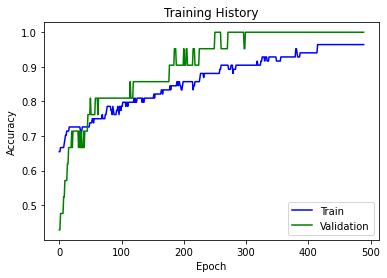

In [19]:
n_skip = 10
plt.plot(my_summary.history["accuracy"][n_skip:], c = "b")
plt.plot(my_summary.history["val_accuracy"][n_skip:], c = "g")
plt.title("Training History")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()

In [20]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))


Test Accuracy : 0.956
